# Week 4: Statistics & Probability
This notebook covers core statistical and probability concepts for data science using Python.
---

## 📊 Day 1: Descriptive Statistics
**Topics:** Mean, Median, Mode, Variance, Standard Deviation, Skewness, Kurtosis
**Dataset:** Titanic

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

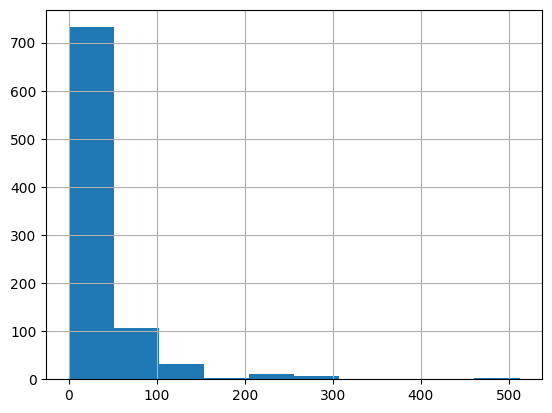

In [4]:
df['fare'].hist()

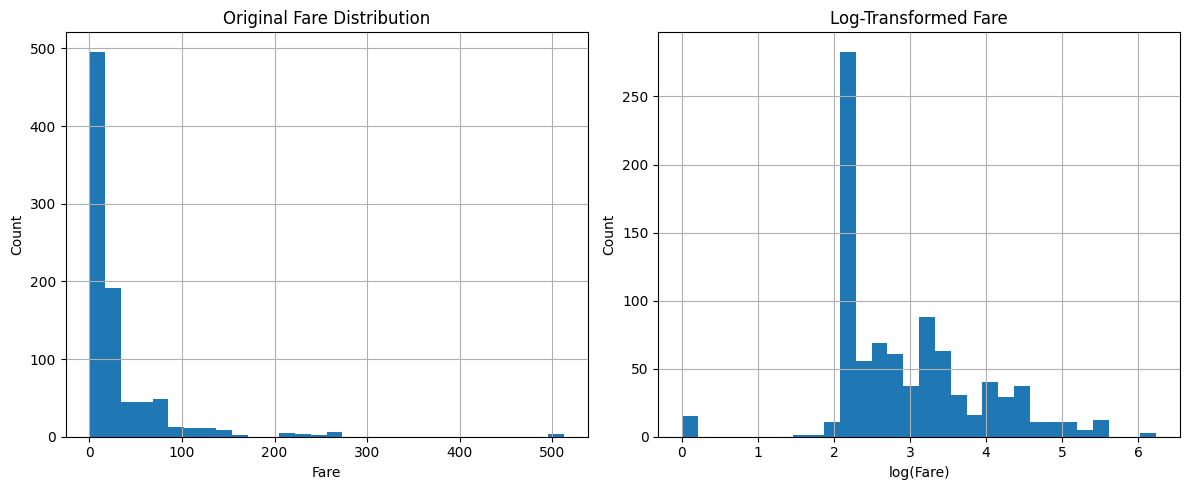

In [5]:
import numpy as np

df['log_fare'] = np.log1p(df['fare'])  # log(1 + fare) to handle 0s
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['fare'].hist(bins=30)
plt.title('Original Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['log_fare'].hist(bins=30)
plt.title('Log-Transformed Fare')
plt.xlabel('log(Fare)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

<Axes: >

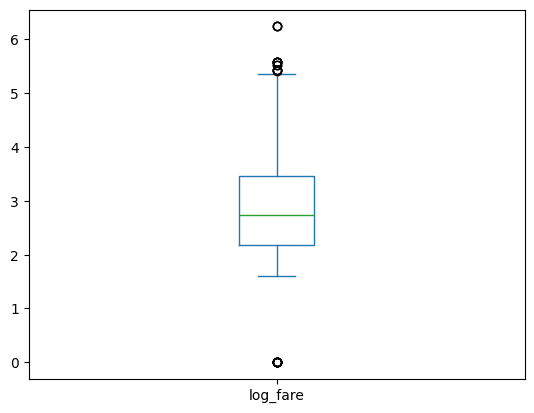

In [6]:
df['log_fare'].plot.box()

## 📈 Day 2: Data Distributions
**Topics:** Normal, Binomial, Poisson Distributions, Z-scores
**Tools:** numpy, scipy.stats

Text(0.5, 1.0, 'Normal Distribution')

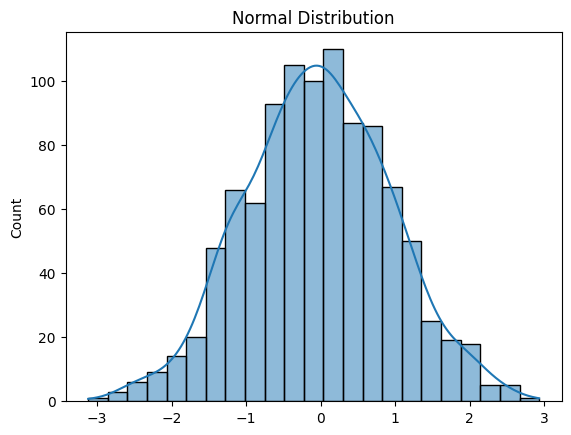

In [7]:
from scipy.stats import norm, binom, poisson
import numpy as np

data = np.random.normal(loc=0, scale=1, size=1000)
sns.histplot(data, kde=True)
plt.title('Normal Distribution')

Binomial Distribution

Text(0.5, 1.0, 'Binomial Distribution')

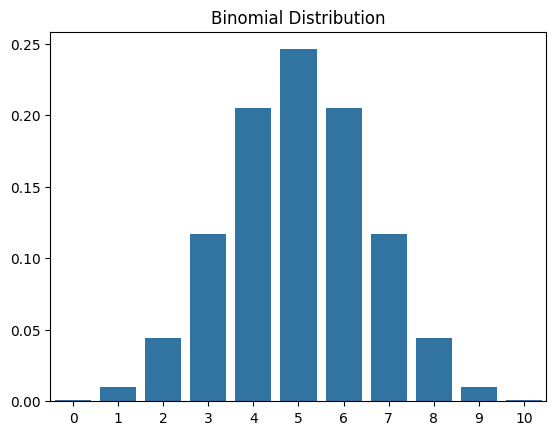

In [8]:
from scipy.stats import binom
n, p = 10, 0.5
x = np.arange(0, 11)
pmf = binom.pmf(x, n, p)
sns.barplot(x=x, y=pmf)
plt.title('Binomial Distribution')

## 🎲 Day 3: Probability Basics
**Topics:** Independent, Conditional Probability, Bayes' Theorem

In [9]:
colors = ['red']*26 + ['black']*26
np.random.choice(colors, size=10)

array(['red', 'black', 'red', 'red', 'black', 'black', 'red', 'black',
       'red', 'black'], dtype='<U5')

## 📐 Day 4: Inferential Statistics
**Topics:** Sampling, Confidence Intervals, Central Limit Theorem

In [10]:
from scipy.stats import sem, t
sample = df['age'].dropna().sample(30, random_state=1)
mean = sample.mean()
confidence_interval = t.interval(0.95, len(sample)-1, loc=mean, scale=sem(sample))
confidence_interval

(np.float64(24.438584234392554), np.float64(35.86141576560745))

## ⚖️ Day 5: Hypothesis Testing
**Topics:** t-test, p-value, significance level
Compare age of survivors vs non-survivors

In [11]:
from scipy.stats import ttest_ind
group1 = df[df['survived'] == 1]['age'].dropna()
group2 = df[df['survived'] == 0]['age'].dropna()
ttest_ind(group1, group2)

TtestResult(statistic=np.float64(-2.06668694625381), pvalue=np.float64(0.03912465401348249), df=np.float64(712.0))

## 🔗 Day 6: Correlation vs Causation
**Topics:** Pearson, Spearman Correlation

Text(0.5, 1.0, 'Correlation Matrix')

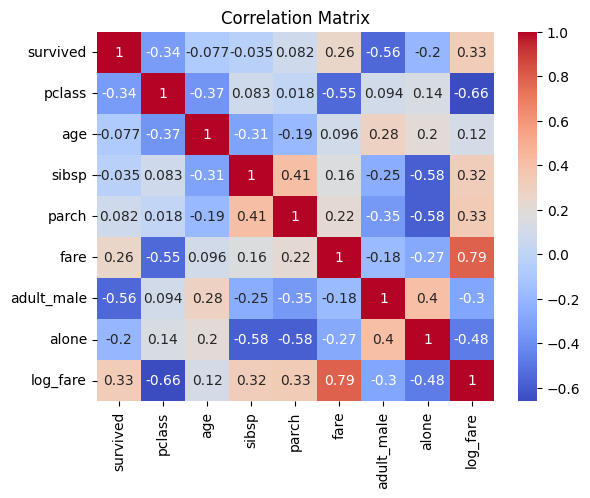

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

## 📘 Day 7: Practice Project
Use Titanic or your dataset to:
- Describe stats
- Explore probability
- Perform a hypothesis test
- Show correlation insights